In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.datasets import imdb

In [2]:
MAX_FEATURES = 10000
INDEX_FROM = 3 # word index offset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES, index_from=INDEX_FROM)

In [3]:
X_train[0][0:12]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468]

In [4]:
word_index = imdb.get_word_index()
word_index = {k:(v+INDEX_FROM) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# To see the words, we create a function, decode review(),
# that provides a simple interface to the dictionary.
def decode_review(text, word_index):
  idx_to_word = {value:key for key, value in word_index.items()}
  words = [idx_to_word[i] for i in text]
  return " ".join(words)

In [5]:
decode_review(X_train[0][0:12], word_index)

"<START> this film was just brilliant casting location scenery story direction everyone's"

In [7]:
tokenizer = Tokenizer(num_words=10000)

X_train_1h = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test_1h = tokenizer.sequences_to_matrix(X_test, mode='binary')

X_train_1h.shape

(25000, 10000)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train_1h, y_train, test_size=2000, random_state=3)

In [9]:
def accuracy(pred, truth):
  return np.mean(np.squeeze(pred) == np.squeeze(truth))

In [10]:
# Fit a logistic regression model
logit = LogisticRegressionCV(penalty='l1', solver='liblinear',
                             fit_intercept=True, cv=10)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_val)
acc_logit = accuracy(y_pred, y_val)

In [11]:
# Building a neural network

model = Sequential(
    [
        Dense(units=16, activation='relu', input_shape=(10000, )),
        Dense(units=16, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

model.compile(
    loss=BinaryCrossentropy(),
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [12]:
history = model.fit(X_train, y_train, epochs=20,
                    batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
45/45 [==============================] - 3s 35ms/step - loss: 0.4766 - accuracy: 0.8102 - val_loss: 0.3504 - val_accuracy: 0.8815
Epoch 2/20
45/45 [==============================] - 1s 28ms/step - loss: 0.2718 - accuracy: 0.9063 - val_loss: 0.2930 - val_accuracy: 0.8900
Epoch 3/20
45/45 [==============================] - 1s 27ms/step - loss: 0.2075 - accuracy: 0.9284 - val_loss: 0.2675 - val_accuracy: 0.8995
Epoch 4/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1727 - accuracy: 0.9397 - val_loss: 0.2757 - val_accuracy: 0.8955
Epoch 5/20
45/45 [==============================] - 1s 27ms/step - loss: 0.1466 - accuracy: 0.9500 - val_loss: 0.3052 - val_accuracy: 0.8815
Epoch 6/20
45/45 [==============================] - 1s 28ms/step - loss: 0.1249 - accuracy: 0.9587 - val_loss: 0.3428 - val_accuracy: 0.8775
Epoch 7/20
45/45 [==============================] - 1s 33ms/step - loss: 0.1112 - accuracy: 0.9630 - val_loss: 0.3275 - val_accuracy: 0.8810
Epoch 8/20
45

Text(0, 0.5, 'Accuracy')

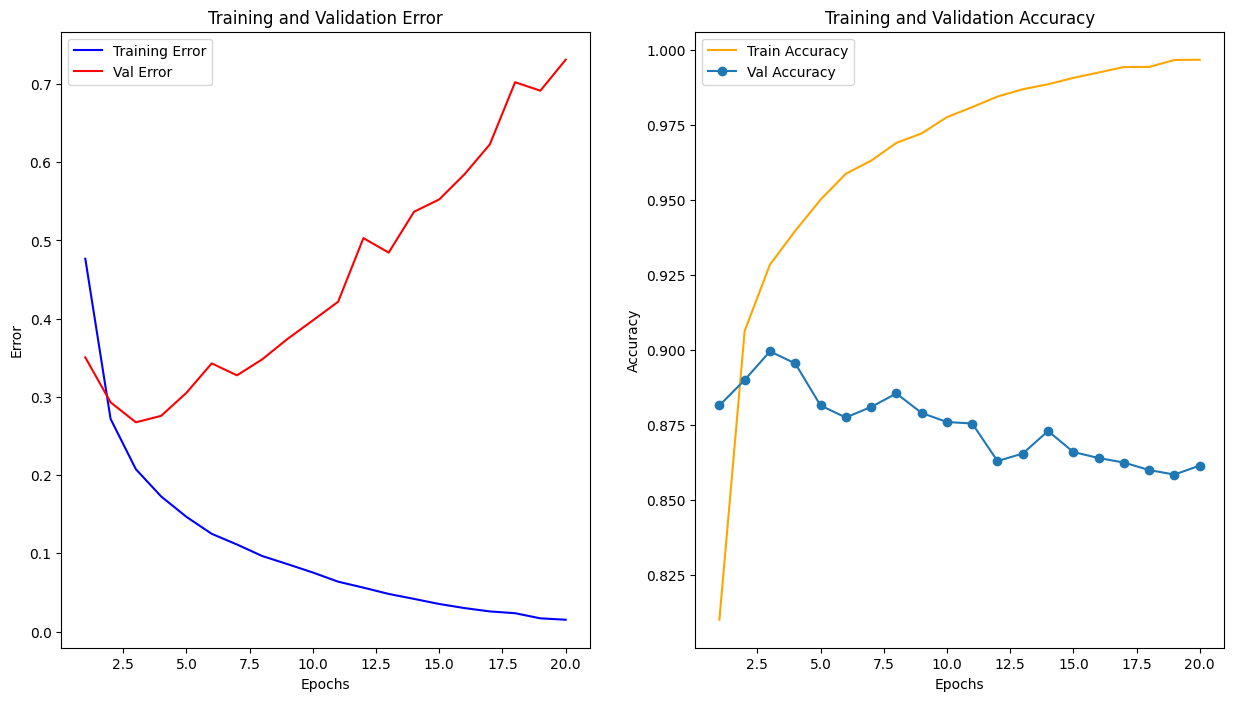

In [15]:
train_errors = history.history['loss']
train_acc = history.history['accuracy']
val_errors = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = np.arange(1, len(train_errors)+1)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(15)

axes[0].plot(epochs, train_errors, 'b-', label='Training Error')
axes[0].plot(epochs, val_errors, 'r-', label='Val Error')
axes[0].set_title('Training and Validation Error')
axes[0].legend()
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Error')

axes[1].plot(epochs, train_acc, 'orange', label='Train Accuracy')
axes[1].plot(epochs, val_acc, 'o-', label='Val Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test_1h, y_test),
                    epochs=20, batch_size=512)

Epoch 1/20
45/45 [==============================] - 5s 108ms/step - loss: 0.0103 - accuracy: 0.9984 - val_loss: 0.7917 - val_accuracy: 0.8496
Epoch 2/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.8412 - val_accuracy: 0.8481
Epoch 3/20
45/45 [==============================] - 2s 41ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.9082 - val_accuracy: 0.8475
Epoch 4/20
45/45 [==============================] - 2s 41ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.9340 - val_accuracy: 0.8468
Epoch 5/20
45/45 [==============================] - 2s 51ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.9689 - val_accuracy: 0.8470
Epoch 6/20
45/45 [==============================] - 2s 50ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.9904 - val_accuracy: 0.8460
Epoch 7/20
45/45 [==============================] - 2s 40ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 1.0263 - val_accuracy: 0.8458
Epoch 8/20
4

In [18]:
print('Logistic Regression Model Test Acc: ', logit.score(X_test_1h, y_test))
print('NN Model Test Acc: ', model.evaluate(X_test_1h, y_test)[1])

Logistic Regression Model Test Acc:  0.87804
782/782 [==============================] - 2s 2ms/step - loss: 1.5035 - accuracy: 0.8414
NN Model Test Acc:  0.8414000272750854
